In [1]:
import os
import getpass
import numpy as np
import pandas as pd
from time import time
from functools import reduce
import matplotlib.pyplot as plt

# Sklearn
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Own Liberay
import PCR_model as model

# PCR - Principal component regression

## Data processing


In [4]:
# Gå et niveau op og naviger til mappen "Data"
os.chdir('../Data')

### 1. Load data

In [6]:
# Import features
file_path = 'Merged_dataset.csv'
df = pd.read_csv("merged_dataset.csv", sep=";", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df.shape

(156, 184)

In [7]:
y = df.iloc[:, 0]   # første kolonne = inflation
X = df.iloc[:, 1:]  # resten = forklarende variable

# Tjek dimensioner
print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (156,)
X shape: (156, 183)


### 2. Imputer manglende værdier

In [9]:
imputer = SimpleImputer(strategy="median")  # Eller "median"

X_imputed = imputer.fit_transform(X)  # Imputer NaN i hele datasættet

# Konverter tilbage til DataFrame med kolonnenavne
X = pd.DataFrame(X_imputed, columns=X.columns, index = df.index)

### 3. Standardiser data 

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simple Forcasting model

In [13]:
# Lav forecast fra sidste kendte måned
forecast_df = model. PCR_Forecaster(
    X=X,
    y=y,
    forecast_horizon=12,
    last_observation_date="2024-12-01",
    scaler=scaler,
    variance_threshold=0.995
)


=== Horisont h=0 ===
Forklaret varians (k=45): 99.53%
Træningsobs: 156 | Komponenter: 45

=== Horisont h=1 ===
Forklaret varians (k=45): 99.52%
Træningsobs: 155 | Komponenter: 45

=== Horisont h=2 ===
Forklaret varians (k=44): 99.51%
Træningsobs: 154 | Komponenter: 44

=== Horisont h=3 ===
Forklaret varians (k=44): 99.52%
Træningsobs: 153 | Komponenter: 44

=== Horisont h=4 ===
Forklaret varians (k=44): 99.52%
Træningsobs: 152 | Komponenter: 44

=== Horisont h=5 ===
Forklaret varians (k=44): 99.52%
Træningsobs: 151 | Komponenter: 44

=== Horisont h=6 ===
Forklaret varians (k=44): 99.52%
Træningsobs: 150 | Komponenter: 44

=== Horisont h=7 ===
Forklaret varians (k=44): 99.52%
Træningsobs: 149 | Komponenter: 44

=== Horisont h=8 ===
Forklaret varians (k=44): 99.52%
Træningsobs: 148 | Komponenter: 44

=== Horisont h=9 ===
Forklaret varians (k=44): 99.53%
Træningsobs: 147 | Komponenter: 44

=== Horisont h=10 ===
Forklaret varians (k=44): 99.52%
Træningsobs: 146 | Komponenter: 44

=== Hori

# Implement of a rolling window

In [15]:
df_pcr_forecast_rolling  = model.pcr_forecast_rolling(X=X, 
                      y=y, 
                      forecast_horizon = 12, 
                      last_observation_date="2024-12-01", 
                      scaler=scaler, 
                      window_length=108,
                      variance_threshold=0.999, 
                      verbose=True)


=== Horisont h=0 ===
Forklaret varians (k=59): 99.91%
Træningsobs: 108 | Komponenter: 59

=== Horisont h=1 ===
Forklaret varians (k=58): 99.90%
Træningsobs: 107 | Komponenter: 58

=== Horisont h=2 ===
Forklaret varians (k=58): 99.91%
Træningsobs: 106 | Komponenter: 58

=== Horisont h=3 ===
Forklaret varians (k=57): 99.90%
Træningsobs: 105 | Komponenter: 57

=== Horisont h=4 ===
Forklaret varians (k=57): 99.90%
Træningsobs: 104 | Komponenter: 57

=== Horisont h=5 ===
Forklaret varians (k=57): 99.91%
Træningsobs: 103 | Komponenter: 57

=== Horisont h=6 ===
Forklaret varians (k=56): 99.90%
Træningsobs: 102 | Komponenter: 56

=== Horisont h=7 ===
Forklaret varians (k=56): 99.90%
Træningsobs: 101 | Komponenter: 56

=== Horisont h=8 ===
Forklaret varians (k=56): 99.91%
Træningsobs: 100 | Komponenter: 56

=== Horisont h=9 ===
Forklaret varians (k=55): 99.90%
Træningsobs: 99 | Komponenter: 55

=== Horisont h=10 ===
Forklaret varians (k=55): 99.90%
Træningsobs: 98 | Komponenter: 55

=== Horiso

In [16]:
df_pcr_forecast_rolling

,Dato,Inflationsforecast,Horizon
0,2025-01-01,1.740013,0
1,2025-02-01,2.336593,1
2,2025-03-01,1.886154,2
3,2025-04-01,2.883629,3
4,2025-05-01,2.298175,4
5,2025-06-01,2.807872,5
6,2025-07-01,3.365108,6
7,2025-08-01,2.988776,7
8,2025-09-01,2.681785,8
9,2025-10-01,3.175845,9


# Forcasting model with a rolling window

In [18]:
forecast_results = model.run_rolling_forecast(X, y, forecast_horizon=12, start_date="2023-01-01", end_date="2024-12-01")


=== Forecast lavet i: 2023-01 ===

=== Forecast lavet i: 2023-02 ===

=== Forecast lavet i: 2023-03 ===

=== Forecast lavet i: 2023-04 ===

=== Forecast lavet i: 2023-05 ===

=== Forecast lavet i: 2023-06 ===

=== Forecast lavet i: 2023-07 ===

=== Forecast lavet i: 2023-08 ===

=== Forecast lavet i: 2023-09 ===

=== Forecast lavet i: 2023-10 ===

=== Forecast lavet i: 2023-11 ===

=== Forecast lavet i: 2023-12 ===

=== Forecast lavet i: 2024-01 ===

=== Forecast lavet i: 2024-02 ===

=== Forecast lavet i: 2024-03 ===

=== Forecast lavet i: 2024-04 ===

=== Forecast lavet i: 2024-05 ===

=== Forecast lavet i: 2024-06 ===

=== Forecast lavet i: 2024-07 ===

=== Forecast lavet i: 2024-08 ===

=== Forecast lavet i: 2024-09 ===

=== Forecast lavet i: 2024-10 ===

=== Forecast lavet i: 2024-11 ===

=== Forecast lavet i: 2024-12 ===


In [20]:
eval_df, merged_df = model.evaluate_forecasts(forecast_results, y)
eval_df

,Horizon,MAE,RMSE,N_obs
0,0,0.754384,1.028924,23
1,1,1.125243,1.555982,22
2,2,1.523041,2.042998,21
3,3,1.752481,2.298045,20
4,4,1.789426,2.302476,19
5,5,1.405971,2.021613,18
6,6,1.520779,2.147911,17
7,7,1.939631,2.754972,16
8,8,2.066118,3.191862,15
9,9,2.554859,3.819151,14


In [21]:
h1 = merged_df[merged_df["Horizon"] == 0]
h1

,Dato,Inflationsforecast,Horizon,Forecast_made_in,y_true,error,abs_error,squared_error
0,2023-02-01,7.867999,0,2023-01-01,7.601,0.266999,0.266999,0.071289
12,2023-03-01,7.613462,0,2023-02-01,6.733,0.880462,0.880462,0.775213
24,2023-04-01,7.171414,0,2023-03-01,5.282,1.889414,1.889414,3.569886
36,2023-05-01,5.459550,0,2023-04-01,2.928,2.531550,2.531550,6.408743
48,2023-06-01,3.835357,0,2023-05-01,2.465,1.370357,1.370357,1.877878
60,2023-07-01,2.707958,0,2023-06-01,3.133,-0.425042,0.425042,0.180661
72,2023-08-01,3.078376,0,2023-07-01,2.437,0.641376,0.641376,0.411364
84,2023-09-01,2.567361,0,2023-08-01,0.859,1.708361,1.708361,2.918496
96,2023-10-01,1.768479,0,2023-09-01,0.085,1.683479,1.683479,2.834103
108,2023-11-01,0.751157,0,2023-10-01,0.600,0.151157,0.151157,0.022849


In [22]:
sum_r = h1["Inflationsforecast"].iloc[11:24].sum() / 12
sum_t = h1["y_true"].iloc[11:24].sum() / 12
print(sum_r)
print(sum_t)

1.1393569357426943
1.3736666666666668


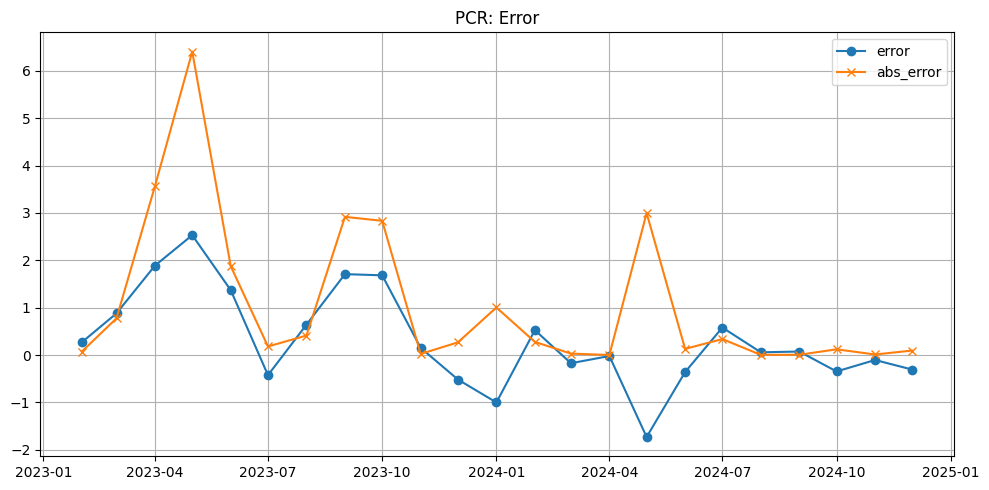

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Dato"], h1["error"], label="error", marker="o")
plt.plot(h1["Dato"], h1["squared_error"], label="abs_error", marker="x")
plt.legend()
plt.title("PCR: Error")
plt.grid(True)
plt.tight_layout()
plt.show()

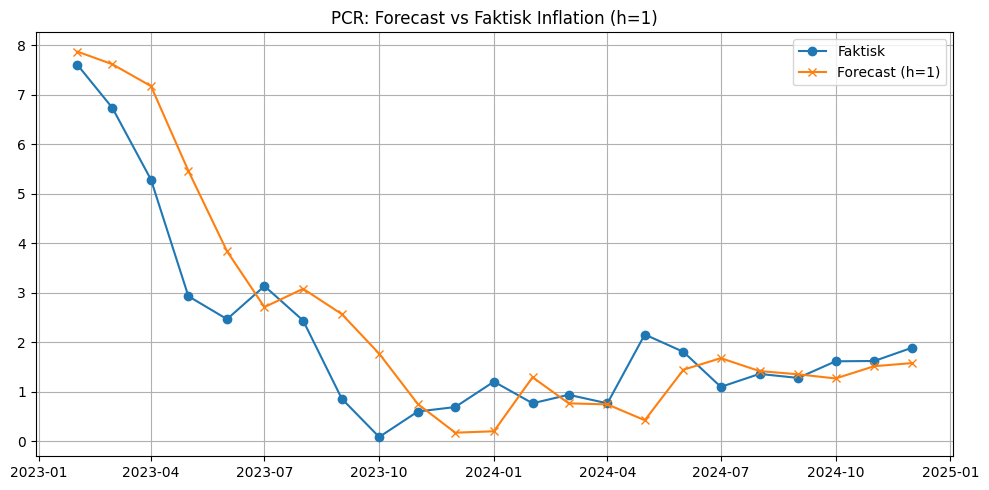

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Dato"], h1["y_true"], label="Faktisk", marker="o")
plt.plot(h1["Dato"], h1["Inflationsforecast"], label="Forecast (h=1)", marker="x")
plt.legend()
plt.title("PCR: Forecast vs Faktisk Inflation (h=1)")
plt.grid(True)
plt.tight_layout()
plt.show()